In [3]:
#Statistical and Machine Learning
#Individual Project

In [4]:
library(tidyverse)
library(tracerer)
library(superml)
library(ggplot2)
library(DataExplorer)
library(caret)
library(pROC)
library(MASS)
library(tree)
library (randomForest)
library (boot)
library (class)
library (Rfast)
library (rpart)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.1.1     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Loading required package: R6

Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift


Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var



Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following obj

### DATA

In [5]:
#load the data
bank <- read.csv("./Data/bank_mkt_train.csv")

In [6]:
head(bank)

,client_id,age,job,marital,education,default,housing,loan,contact,month,⋯,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,29925,42,management,married,basic.9y,no,no,no,cellular,jul,⋯,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
2,37529,35,unemployed,married,university.degree,no,yes,no,telephone,jun,⋯,4,999,0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,0
3,2757,44,technician,married,basic.9y,no,yes,yes,cellular,may,⋯,1,999,0,nonexistent,-1.8,92.893,-46.2,1.264,5099.1,0
4,9642,45,services,married,high.school,no,yes,no,cellular,apr,⋯,1,999,0,nonexistent,-1.8,93.075,-47.1,1.453,5099.1,0
5,14183,45,unknown,married,unknown,unknown,unknown,unknown,telephone,may,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0
6,15180,38,technician,married,professional.course,no,no,no,telephone,may,⋯,2,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,0


In [7]:
introduce(bank)

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
20000,21,10,11,0,3664,16633,420000,2888176


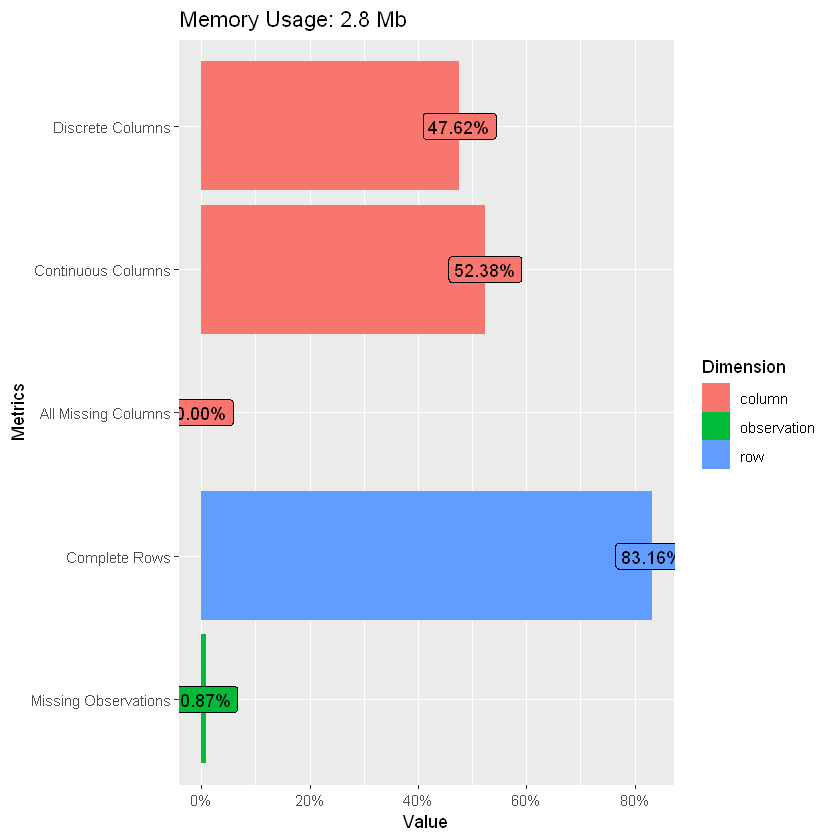

In [8]:
plot_intro(bank)

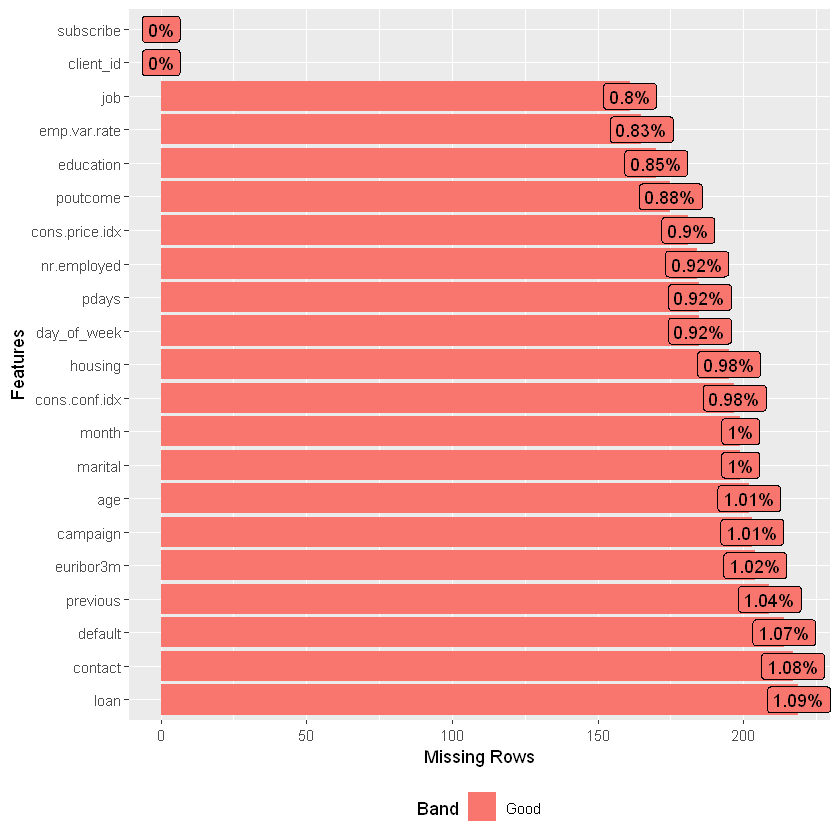

In [9]:
plot_missing(bank)

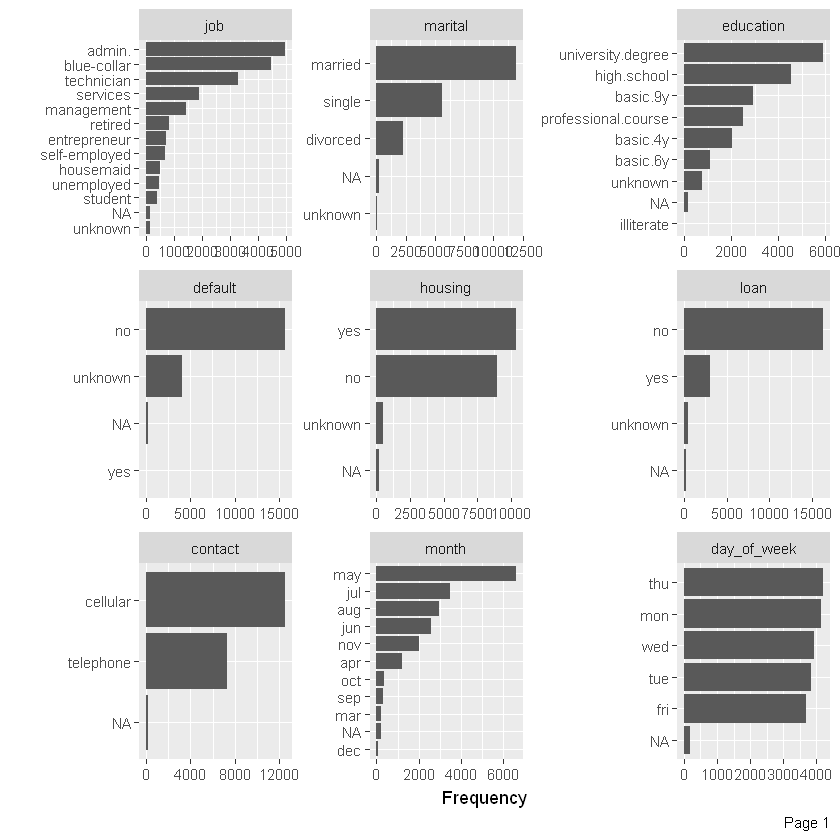

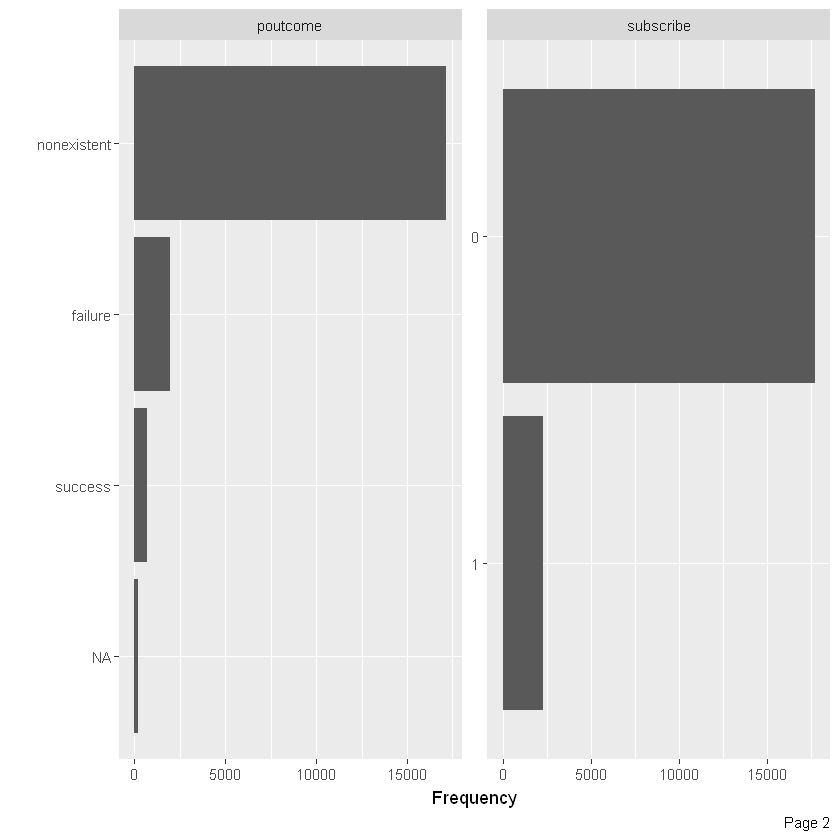

In [10]:
plot_bar(bank)

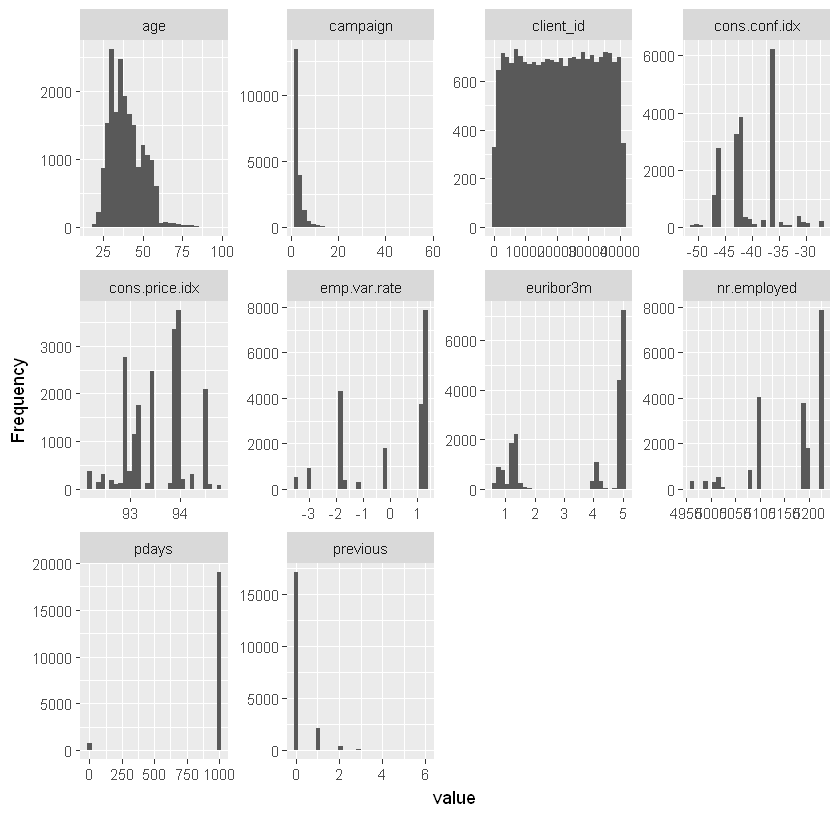

In [11]:
plot_histogram(bank)


In [12]:
#count the Null values on each column
sapply(bank, function(x) sum(is.na(x)))


client_id            age            job        marital      education 
             0            202            161            199            170 
       default        housing           loan        contact          month 
           214            195            219            217            199 
   day_of_week       campaign          pdays       previous       poutcome 
           185            203            185            209            175 
  emp.var.rate cons.price.idx  cons.conf.idx      euribor3m    nr.employed 
           165            181            197            204            184 
     subscribe 
             0

In [13]:
#look ig people that are missing age also have other missing values
#since there seems to not be the case wee need to replace the missing values with the mode and mean respectively
bank[is.na(bank$age),]

,client_id,age,job,marital,education,default,housing,loan,contact,month,⋯,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
184,14607,NA,technician,married,professional.course,no,no,no,telephone,may,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
205,31351,NA,management,married,university.degree,no,yes,no,cellular,aug,⋯,4,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
211,28390,NA,admin.,single,high.school,no,yes,no,telephone,jun,⋯,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,0
485,16951,NA,blue-collar,married,high.school,unknown,no,no,cellular,may,⋯,1,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,0
486,20439,NA,blue-collar,married,basic.9y,no,yes,no,cellular,apr,⋯,1,999,1,failure,-1.8,93.075,-47.1,1.405,5099.1,0
500,23948,NA,services,divorced,basic.4y,unknown,yes,no,telephone,may,⋯,2,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,0
558,30603,NA,technician,married,professional.course,no,yes,no,cellular,may,⋯,1,999,NA,nonexistent,-1.8,92.893,NA,1.327,5099.1,0
780,1042,NA,management,married,high.school,no,no,yes,telephone,may,⋯,2,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,0
816,37491,NA,blue-collar,married,basic.9y,no,yes,no,cellular,may,⋯,1,999,0,nonexistent,-1.8,92.893,-46.2,1.344,5099.1,0


### REPLACE NULL VALUES UNKNOWN

In [14]:

#Replace NA in the Marital variable
bank <- bank %>% 
  mutate(marital = if_else(is.na(marital), 
                         "unknown", 
                         marital))
#Replace NA in the Education variable
bank <- bank %>% 
  mutate(education = if_else(is.na(education), 
                         "unknown", 
                         education))

#Replace NA in the default variable
bank <- bank %>% 
  mutate(default = if_else(is.na(default), 
                         "unknown", 
                         default))

#Replace NA in the Housing variable
bank <- bank %>% 
  mutate(housing = if_else(is.na(housing), 
                         "unknown", 
                         housing))

#Replace NA in the Loan variable
bank <- bank %>% 
  mutate(loan = if_else(is.na(loan), 
                         "unknown", 
                         loan))



#Replace NA in the poutcome variable
bank <- bank %>% 
  mutate(poutcome = if_else(is.na(poutcome), 
                         "nonexistent", 
                         poutcome))



### ENCODING

In [15]:
#LABEL ENCONDING 
lbl_job = LabelEncoder$new()
bank$job = lbl_job$fit_transform(bank$job)

lbl_marital = LabelEncoder$new()
bank$marital = lbl_marital$fit_transform(bank$marital)

lbl_default = LabelEncoder$new()
bank$default = lbl_default$fit_transform(bank$default)

lbl_housing = LabelEncoder$new()
bank$housing = lbl_housing$fit_transform(bank$housing)

lbl_loan = LabelEncoder$new()
bank$loan = lbl_loan$fit_transform(bank$loan)

lbl_contact = LabelEncoder$new()
bank$contact = lbl_contact$fit_transform(bank$contact)


lbl_month = LabelEncoder$new()
bank$month = lbl_month$fit_transform(bank$month)



lbl_day_of_week = LabelEncoder$new()
bank$day_of_week = lbl_day_of_week$fit_transform(bank$day_of_week)

lbl_poutcome = LabelEncoder$new()
bank$poutcome = lbl_poutcome$fit_transform(bank$poutcome)



The data contains NA values. Imputing NA with 'NA' 

The data contains NA values. Imputing NA with 'NA' 

The data contains NA values. Imputing NA with 'NA' 

The data contains NA values. Imputing NA with 'NA' 



### DATA SPLIT

In [16]:
## 75% of the sample size
smp_size <- floor(0.75 * nrow(bank))

## set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(bank)), size = smp_size)

train <- bank[train_ind, ]
test <- bank[-train_ind, ]

#https://stackoverflow.com/questions/17200114/how-to-split-data-into-training-testing-sets-using-sample-function

### REPLACE NUMERIC VALUES

In [17]:
#Replace NA in the Age variable

train$age <- replace_na(train$age, floor(mean(train$age,na.rm = TRUE)))

#Replace NA in the Job variable
train <- train %>% 
  mutate(job = if_else(is.na(job), 
                         calc_mode(job), 
                         job))


#Replace NA in the Contact variable
train <- train %>% 
  mutate(contact = if_else(is.na(contact), 
                         calc_mode(contact), 
                         contact))

#Replace NA in the Month variable
train <- train %>% 
  mutate(month = if_else(is.na(month), 
                         calc_mode(month), 
                         month))

#Replace NA in the Day of Week variable
train <- train %>% 
  mutate(day_of_week = if_else(is.na(day_of_week), 
                         calc_mode(day_of_week), 
                         day_of_week))

#Replace NA in the Day of Week variable
train <- train %>% 
  mutate(day_of_week = if_else(is.na(day_of_week), 
                         calc_mode(day_of_week), 
                         day_of_week))




#Replace NA in the Campaign variable
train <- train %>% 
  mutate(campaign = if_else(is.na(campaign), 
                         calc_mode(campaign), 
                         campaign))


#Replace NA in the pdays variable

train$pdays <- replace_na(train$pdays,0)


#Replace NA in the Previous variable

train <- train %>% 
  mutate(previous = if_else(is.na(previous), 
                         calc_mode(previous), 
                         previous))


#Replace NA in the emp.var.rate variable

train$emp.var.rate <- replace_na(train$emp.var.rate, mean(train$emp.var.rate,na.rm = TRUE))

#Replace NA in the cons.price.idx variable

train$cons.price.idx <- replace_na(train$cons.price.idx, mean(train$cons.price.idx,na.rm = TRUE))

#Replace NA in the cons.conf.idx variable

train$cons.conf.idx <- replace_na(train$cons.conf.idx, floor(mean(train$cons.conf.idx,na.rm = TRUE)))

#Replace NA in the euribor3m variable

train$euribor3m <- replace_na(train$euribor3m, floor(mean(train$euribor3m,na.rm = TRUE)))

#Replace NA in the nr.employed variable

train$nr.employed <- replace_na(train$nr.employed, floor(mean(train$nr.employed,na.rm = TRUE)))

In [18]:
#Replace NA in the Age variable

test$age <- replace_na(test$age, floor(mean(test$age,na.rm = TRUE)))

#Replace NA in the Job variable
test <- test %>% 
  mutate(job = if_else(is.na(job), 
                         calc_mode(job), 
                         job))


#Replace NA in the Contact variable
test <- test %>% 
  mutate(contact = if_else(is.na(contact), 
                         calc_mode(contact), 
                         contact))

#Replace NA in the Month variable
test <- test %>% 
  mutate(month = if_else(is.na(month), 
                         calc_mode(month), 
                         month))

#Replace NA in the Day of Week variable
test <- test %>% 
  mutate(day_of_week = if_else(is.na(day_of_week), 
                         calc_mode(day_of_week), 
                         day_of_week))

#Replace NA in the Day of Week variable
test <- test %>% 
  mutate(day_of_week = if_else(is.na(day_of_week), 
                         calc_mode(day_of_week), 
                         day_of_week))




#Replace NA in the Campaign variable
test <- test %>% 
  mutate(campaign = if_else(is.na(campaign), 
                         calc_mode(campaign), 
                         campaign))


#Replace NA in the pdays variable

test$pdays <- replace_na(test$pdays,0)


#Replace NA in the Previous variable

test <- test %>% 
  mutate(previous = if_else(is.na(previous), 
                         calc_mode(previous), 
                         previous))


#Replace NA in the emp.var.rate variable

test$emp.var.rate <- replace_na(test$emp.var.rate, mean(test$emp.var.rate,na.rm = TRUE))

#Replace NA in the cons.price.idx variable

test$cons.price.idx <- replace_na(test$cons.price.idx, mean(test$cons.price.idx,na.rm = TRUE))

#Replace NA in the cons.conf.idx variable

test$cons.conf.idx <- replace_na(test$cons.conf.idx, floor(mean(test$cons.conf.idx,na.rm = TRUE)))

#Replace NA in the euribor3m variable

test$euribor3m <- replace_na(test$euribor3m, floor(mean(test$euribor3m,na.rm = TRUE)))

#Replace NA in the nr.employed variable

test$nr.employed <- replace_na(test$nr.employed, floor(mean(test$nr.employed,na.rm = TRUE)))

In [19]:

#create dummy variable for contacted or not
train <- train %>% 
  mutate(not_contacted = if_else(pdays==999, 
                         1, 
                         0))

#create dummy variable for contacted or not
test <- test %>% 
  mutate(not_contacted = if_else(pdays==999, 
                         1, 
                         0))

In [20]:
#create ordinal function
encode_ordinal <- function(x) {
  x <- as.numeric(factor(x, levels = order, exclude = NULL))
  x
}

In [21]:
#Set order for ordial variable on education
order = c("unknown","illiterate","basic.4y","basic.6y","basic.9y","high.school","professional.course","university.degree") 

In [22]:
train[["education"]] <- encode_ordinal(train[["education"]])
test[["education"]] <- encode_ordinal(test[["education"]])

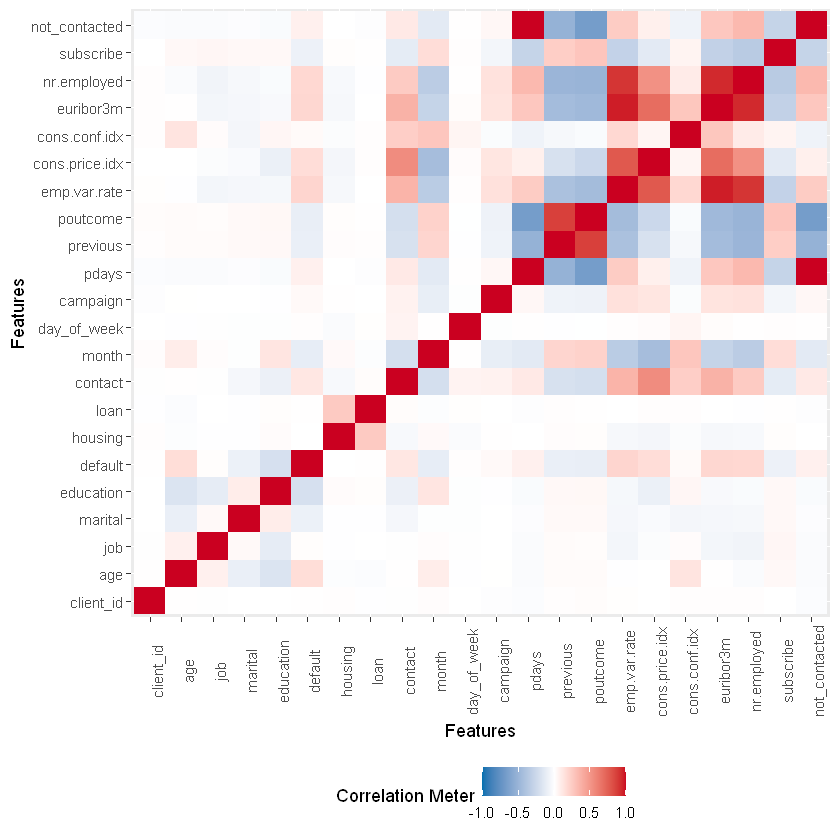

In [23]:
#plot  the correlation matrix
plot_correlation(train)

In [24]:
#Transforming CAtegorical into factors

train$job <- as.factor(train$job)
train$marital<- as.factor(train$marital)
train$default <- as.factor(train$default)
train$housing <- as.factor(train$housing)
train$loan <- as.factor(train$loan)
train$contact <- as.factor(train$contact)
train$contact <- as.factor(train$contact)
train$month <- as.factor(train$month)
train$day_of_week <- as.factor(train$day_of_week)
train$poutcome <- as.factor(train$poutcome)
train$subscribe <- as.factor(train$subscribe)





In [25]:
#Transforming CAtegorical into factors

test$job <- as.factor(test$job)
test$marital<- as.factor(test$marital)
test$default <- as.factor(test$default)
test$housing <- as.factor(test$housing)
test$loan <- as.factor(test$loan)
test$contact <- as.factor(test$contact)
test$contact <- as.factor(test$contact)
test$month <- as.factor(test$month)
test$day_of_week <- as.factor(test$day_of_week)
test$poutcome <- as.factor(test$poutcome)
test$subscribe <- as.factor(test$subscribe)

In [26]:
train <- subset (train, select = -client_id)
test <- subset (test, select = -client_id)

In [27]:
write.csv(train,"./Data/bank_train_split.csv")
write.csv(test,"./Data/bank_test_split.csv")

In [28]:
str(train)

'data.frame':	15000 obs. of  21 variables:
 $ age           : num  54 53 40 28 31 40 42 54 31 48 ...
 $ job           : Factor w/ 13 levels "0","1","2","3",..: 3 6 3 7 7 1 8 10 10 7 ...
 $ marital       : Factor w/ 4 levels "0","1","2","3": 3 1 1 2 2 1 1 3 2 1 ...
 $ education     : num  8 5 4 8 8 8 3 3 7 8 ...
 $ default       : Factor w/ 3 levels "0","1","2": 1 1 2 1 1 1 2 2 2 1 ...
 $ housing       : Factor w/ 3 levels "0","1","2": 1 1 2 2 1 1 1 2 2 2 ...
 $ loan          : Factor w/ 3 levels "0","1","2": 1 1 1 1 1 1 1 1 2 1 ...
 $ contact       : Factor w/ 3 levels "0","1","2": 1 2 1 1 2 1 1 2 1 1 ...
 $ month         : Factor w/ 11 levels "0","1","2","3",..: 5 1 6 3 3 4 3 3 5 5 ...
 $ day_of_week   : Factor w/ 6 levels "0","1","2","3",..: 3 1 3 5 4 2 2 5 3 4 ...
 $ campaign      : int  3 2 3 4 1 3 2 9 1 5 ...
 $ pdays         : num  999 999 999 999 999 999 999 999 999 999 ...
 $ previous      : int  0 0 0 1 0 0 1 0 0 0 ...
 $ poutcome      : Factor w/ 3 levels "0","1","2": 1 1 1 2

In [29]:
#duplicate table, to normalize numerical values for Knn mode

trainknn = train

testknn = test

In [31]:
trainknn

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,⋯,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe,not_contacted
,"<dbl[,1]>",<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,"<dbl[,1]>","<dbl[,1]>",<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
18847,1.343991454,2,2,8,0,0,0,0,4,2,⋯,0.2199101,-0.3441231,0,1.4,93.444,-36.1,4.968,5228.1,0,1
18895,1.247653965,5,0,5,0,0,0,1,0,0,⋯,0.2199101,-0.3441231,0,1.4,93.918,-42.7,4.966,5228.1,0,1
2986,-0.004733382,2,0,4,1,1,0,0,5,2,⋯,0.2199101,-0.3441231,0,-0.1,93.200,-42.0,4.153,5195.8,0,1
1842,-1.160783241,6,1,8,0,1,0,0,2,4,⋯,0.2199101,1.7050417,1,-1.8,92.893,-46.2,1.250,5099.1,0,1
3371,-0.871770776,6,1,8,0,0,0,1,2,3,⋯,0.2199101,-0.3441231,0,1.1,93.994,-36.4,4.856,5191.0,1,1
11638,-0.004733382,0,0,8,0,0,0,0,3,1,⋯,0.2199101,-0.3441231,0,-1.8,93.075,-47.1,1.405,5099.1,0,1
4761,0.187941595,7,0,3,1,0,0,0,2,1,⋯,0.2199101,1.7050417,1,-1.8,92.893,-46.2,1.299,5099.1,0,1
6746,1.343991454,9,2,3,1,1,0,1,2,4,⋯,0.2199101,-0.3441231,0,1.1,93.994,-36.4,4.864,5191.0,0,1
16128,-0.871770776,9,1,7,1,1,1,0,4,2,⋯,0.2199101,-0.3441231,0,1.4,93.444,-36.1,4.966,5228.1,0,1


In [32]:
#scale the numerical values to apply the knn model

num_list = c("age","campaign","pdays","previous","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.enployed")
i_cols = which(names(trainknn)%in%num_list)

for (i in i_cols ){
    trainknn[,i] <- scale(trainknn[,i], center= TRUE, scale = TRUE)
}



In [33]:
num_list = c("age","campaign","pdays","previous","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.enployed")
i_cols = which(names(testknn)%in%num_list)

for (i in i_cols ){
    testknn[,i] <- scale(testknn[,i], center= TRUE, scale = TRUE)
}

## MODELS

### Logistic Regresion

In [111]:
#fit the Generalized Linear model
glm.model <- glm (subscribe~. , family = binomial , data = train )
summary(glm.model)


Call:
glm(formula = subscribe ~ ., family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1332  -0.4064  -0.3308  -0.2660   2.9203  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -2.405e+01  2.683e+01  -0.896 0.370018    
age             2.445e-03  3.407e-03   0.718 0.473057    
job1           -1.116e-02  2.045e-01  -0.055 0.956459    
job2           -1.521e-01  1.286e-01  -1.183 0.236860    
job3           -1.471e-01  1.480e-01  -0.994 0.320179    
job4           -3.497e-04  3.513e-01  -0.001 0.999206    
job5           -2.500e-01  1.351e-01  -1.850 0.064246 .  
job6           -4.135e-02  1.192e-01  -0.347 0.728660    
job7           -1.128e-01  1.926e-01  -0.585 0.558366    
job8            2.144e-01  1.693e-01   1.267 0.205270    
job9           -5.269e-02  2.216e-01  -0.238 0.812095    
job10           2.138e-01  1.965e-01   1.088 0.276693    
job11          -2.778e-01  1.936e-01  -1.435 0.1

In [112]:
#apply a stepfoward selection model on the gml.model
step.glm.model = stepAIC(glm.model,direction="backward",trace=FALSE)
summary(step.glm.model)


Call:
glm(formula = subscribe ~ age + marital + default + contact + 
    month + day_of_week + campaign + poutcome + emp.var.rate + 
    cons.price.idx + cons.conf.idx + nr.employed + not_contacted, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0814  -0.4041  -0.3328  -0.2678   2.8771  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -25.345484  24.636883  -1.029 0.303592    
age              0.005398   0.002733   1.975 0.048242 *  
marital1         0.172093   0.070974   2.425 0.015320 *  
marital2        -0.049889   0.098241  -0.508 0.611581    
marital3         0.599942   0.221015   2.714 0.006638 ** 
default1        -0.209672   0.086292  -2.430 0.015108 *  
default2        -8.596351 138.789630  -0.062 0.950612    
contact1        -0.365789   0.098119  -3.728 0.000193 ***
contact2        -0.096238   0.265301  -0.363 0.716790    
month1          -0.211847   0.136614  -1.551 0.120974

In [113]:
#fit our data with he improved model 
glm.model.best = glm(formula = subscribe ~ age + marital + default + contact + 
    month + day_of_week + campaign + poutcome + emp.var.rate + 
    cons.price.idx + cons.conf.idx + nr.employed + not_contacted, family = binomial, 
    data = train)
summary(glm.model.best)


Call:
glm(formula = subscribe ~ age + marital + default + contact + 
    month + day_of_week + campaign + poutcome + emp.var.rate + 
    cons.price.idx + cons.conf.idx + nr.employed + not_contacted, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0814  -0.4041  -0.3328  -0.2678   2.8771  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -25.345484  24.636883  -1.029 0.303592    
age              0.005398   0.002733   1.975 0.048242 *  
marital1         0.172093   0.070974   2.425 0.015320 *  
marital2        -0.049889   0.098241  -0.508 0.611581    
marital3         0.599942   0.221015   2.714 0.006638 ** 
default1        -0.209672   0.086292  -2.430 0.015108 *  
default2        -8.596351 138.789630  -0.062 0.950612    
contact1        -0.365789   0.098119  -3.728 0.000193 ***
contact2        -0.096238   0.265301  -0.363 0.716790    
month1          -0.211847   0.136614  -1.551 0.120974

In [114]:
#set Cross validation
set.seed(123) 
train.control <- trainControl(method = "cv", number = 10)
model <- train(subscribe ~ age + marital + default + contact + 
    month + day_of_week + campaign + poutcome + emp.var.rate + 
    cons.price.idx + cons.conf.idx + nr.employed + not_contacted, family = binomial, 
    data = train, method = "glm",
               trControl = train.control)
model

Generalized Linear Model 

15000 samples
   13 predictor
    2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 13500, 13500, 13500, 13500, 13500, 13500, ... 
Resampling results:

  Accuracy   Kappa    
  0.8969332  0.2797499


In [65]:
#predict
glm.probs =predict(glm.model.best,test,type="response")
glm.probs[glm.probs>0.5]= 1
glm.probs[glm.probs<0.5]= 0
glm.probs[1:10]

3  8 12 23 24 34 35 39 42 46 
 0  0  0  0  0  0  0  0  0  0

In [66]:

glm.probs= factor(glm.probs)


In [67]:
#confusion Matrix
confusionMatrix(glm.probs,test$subscribe,mode = "everything")

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 4384  416
         1   73  127
                                          
               Accuracy : 0.9022          
                 95% CI : (0.8936, 0.9103)
    No Information Rate : 0.8914          
    P-Value [Acc > NIR] : 0.006902        
                                          
                  Kappa : 0.301           
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9836          
            Specificity : 0.2339          
         Pos Pred Value : 0.9133          
         Neg Pred Value : 0.6350          
              Precision : 0.9133          
                 Recall : 0.9836          
                     F1 : 0.9472          
             Prevalence : 0.8914          
         Detection Rate : 0.8768          
   Detection Prevalence : 0.9600          
      Balanced Accuracy 

In [68]:
#print the AUC
pred_roc <- pROC::roc(as.numeric(glm.probs), as.numeric(test$subscribe == 1))
pred_auc <- pROC::auc(pred_roc)
print(paste('AUC =', pred_auc))

Setting levels: control = 1, case = 2

Setting direction: controls < cases



[1] "AUC = 0.774166666666667"


### KNN

In [34]:
# Fit the KNN model with the train

# k = 5
set.seed(123)
knn1_pred <- class::knn(train=trainknn,
                 test=testknn,
                 cl=trainknn$subscribe,
                 k=5)

# Confusion matrix
print('Confusion matrix:')
#confusion Matrix
confusionMatrix(knn1_pred,testknn$subscribe,mode = "everything")


[1] "Confusion matrix:"


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 4357  336
         1  100  207
                                          
               Accuracy : 0.9128          
                 95% CI : (0.9046, 0.9205)
    No Information Rate : 0.8914          
    P-Value [Acc > NIR] : 3.069e-07       
                                          
                  Kappa : 0.4434          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9776          
            Specificity : 0.3812          
         Pos Pred Value : 0.9284          
         Neg Pred Value : 0.6743          
              Precision : 0.9284          
                 Recall : 0.9776          
                     F1 : 0.9523          
             Prevalence : 0.8914          
         Detection Rate : 0.8714          
   Detection Prevalence : 0.9386          
      Balanced Accuracy 

In [35]:
#set Cross validation
set.seed(123) 
train.control <- trainControl(method = "cv", number = 10)
model <- train(subscribe ~.,
    data = trainknn, method = "knn",
               trControl = train.control)
model

k-Nearest Neighbors 

15000 samples
   20 predictor
    2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 13500, 13500, 13500, 13500, 13500, 13500, ... 
Resampling results across tuning parameters:

  k  Accuracy   Kappa    
  5  0.8857996  0.2944562
  7  0.8908666  0.3049975
  9  0.8919335  0.3046720

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 9.

In [36]:
# Fit the KNN model with the train and thjje best k value

# k = 7
set.seed(123)
knn.best.pred <- class::knn(train=trainknn,
                 test=testknn,
                 cl=trainknn$subscribe,
                 k=9)

# Confusion matrix
confusionMatrix(knn.best.pred,testknn$subscribe,mode = "everything")

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 4371  341
         1   86  202
                                          
               Accuracy : 0.9146          
                 95% CI : (0.9065, 0.9222)
    No Information Rate : 0.8914          
    P-Value [Acc > NIR] : 2.91e-08        
                                          
                  Kappa : 0.4443          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9807          
            Specificity : 0.3720          
         Pos Pred Value : 0.9276          
         Neg Pred Value : 0.7014          
              Precision : 0.9276          
                 Recall : 0.9807          
                     F1 : 0.9534          
             Prevalence : 0.8914          
         Detection Rate : 0.8742          
   Detection Prevalence : 0.9424          
      Balanced Accuracy 

In [37]:
pred_roc <- pROC::roc(as.numeric(knn.best.pred), as.numeric(testknn$subscribe == 1))
pred_auc <- pROC::auc(pred_roc)
print(paste('AUC =', pred_auc))

Setting levels: control = 1, case = 2

Setting direction: controls < cases



[1] "AUC = 0.814510233918129"


### LDA

In [73]:
lda.model <- lda(subscribe~., data = train )
summary(lda.model)

        Length Class  Mode     
prior    2     -none- numeric  
counts   2     -none- numeric  
means   96     -none- numeric  
scaling 48     -none- numeric  
lev      2     -none- character
svd      1     -none- numeric  
N        1     -none- numeric  
call     3     -none- call     
terms    3     terms  call     
xlevels  9     -none- list     

In [44]:
#Backward Stepwise for feature selection
set.seed(123)
c_1 <- trainControl(method = "none")

maxvar     <-(4) 
direction <-"backward"
tune_1     <-data.frame(maxvar,direction)
step.lda.model <- train(subscribe~., data=train, method = "stepLDA", trControl=c_1, tuneGrid=tune_1)


 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.

15000 observations of 48 variables in 2 classes; direction: backward

stop criterion: assemble 4 best variables.



correctness rate: 0.88653;  starting variables (48): age, job1, job2, job3, job4, job5, job6, job7, job8, job9, job10, job11, marital1, marital2, marital3, marital4, education, default1, default2, housing1, housing2, loan1, loan2, contact1, month1, month2, month3, month4, month5, month6, month7, month8, month9, day_of_week1, day_of_week2, day_of_week3, day_of_week4, campaign, pdays, previous, poutcome1, poutcome2, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, not_contacted 
correctness rate: 0.8878;  out: "month3";  variables (47): age, job1, job2, job3, job4, job5, job6, job7, job8, job9, job10, job11, marital1, marital2, marital3, marital4, education, default1, default2, housing1, housing2, loan1, loan2, contact1, month1, month2, month4, month5, month6, month7, month8, month9, day_of_week1, day_of_week2, day_of_week3, day_of_week4, campaign, pdays, previous, poutcome1, poutcome2, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, not_contacted

In [45]:
#set Cross validation
set.seed(123) 
train.control <- trainControl(method = "cv", number = 10)
cv.lda <- train(subscribe ~  age + job+  marital+  education + default+housing+ loan+ contact+ month+ day_of_week+ campaign+ pdays+previous+poutcome+emp.var.rate+ cons.price.idx+ euribor3m+ nr.employed+not_contacted, 
               data = train, method = "lda",
               trControl = train.control)
cv.lda

Linear Discriminant Analysis 

15000 samples
   19 predictor
    2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 13500, 13500, 13500, 13500, 13500, 13500, ... 
Resampling results:

  Accuracy   Kappa    
  0.8877341  0.3583412


In [46]:
lda.best.model <- lda(subscribe ~  age + job+  marital+  education + default+housing+ loan+ contact+ month+ day_of_week+ campaign+ pdays+previous+poutcome+emp.var.rate+ cons.price.idx+ euribor3m+ nr.employed+not_contacted, 
    data = train)
summary(lda.best.model)

        Length Class  Mode     
prior    2     -none- numeric  
counts   2     -none- numeric  
means   94     -none- numeric  
scaling 47     -none- numeric  
lev      2     -none- character
svd      1     -none- numeric  
N        1     -none- numeric  
call     3     -none- call     
terms    3     terms  call     
xlevels  9     -none- list     

In [47]:
lda.probs =predict(lda.best.model,test,type="response")
lda.probs

,0,1
3,0.8467583,0.153241666
8,0.9579713,0.042028695
12,0.9736342,0.026365818
23,0.8537568,0.146243189
24,0.9562078,0.043792232
34,0.9691530,0.030847033
35,0.9734917,0.026508329
39,0.9934208,0.006579165
42,0.6910019,0.308998078
46,0.9978574,0.002142564


In [48]:
confusionMatrix(lda.probs$class,test$subscribe,mode = "everything")

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 4267  349
         1  190  194
                                          
               Accuracy : 0.8922          
                 95% CI : (0.8833, 0.9007)
    No Information Rate : 0.8914          
    P-Value [Acc > NIR] : 0.4391          
                                          
                  Kappa : 0.3611          
                                          
 Mcnemar's Test P-Value : 1.007e-11       
                                          
            Sensitivity : 0.9574          
            Specificity : 0.3573          
         Pos Pred Value : 0.9244          
         Neg Pred Value : 0.5052          
              Precision : 0.9244          
                 Recall : 0.9574          
                     F1 : 0.9406          
             Prevalence : 0.8914          
         Detection Rate : 0.8534          
   Detection Prevalence : 0.9232          
      Balanced Accuracy 

In [49]:
pred_roc <- pROC::roc(as.numeric(lda.probs$class), as.numeric(test$subscribe == 1))
pred_auc <- pROC::auc(pred_roc)
print(paste('AUC =', pred_auc))

Setting levels: control = 1, case = 2

Setting direction: controls < cases



[1] "AUC = 0.714800873772386"


### DESICION TREE

In [50]:
tree.model <- tree(subscribe ~., data=train)
summary(tree.model)


Classification tree:
tree(formula = subscribe ~ ., data = train)
Variables actually used in tree construction:
[1] "nr.employed" "poutcome"    "month"      
Number of terminal nodes:  4 
Residual mean deviance:  0.5834 = 8748 / 15000 
Misclassification error rate: 0.1031 = 1547 / 15000 

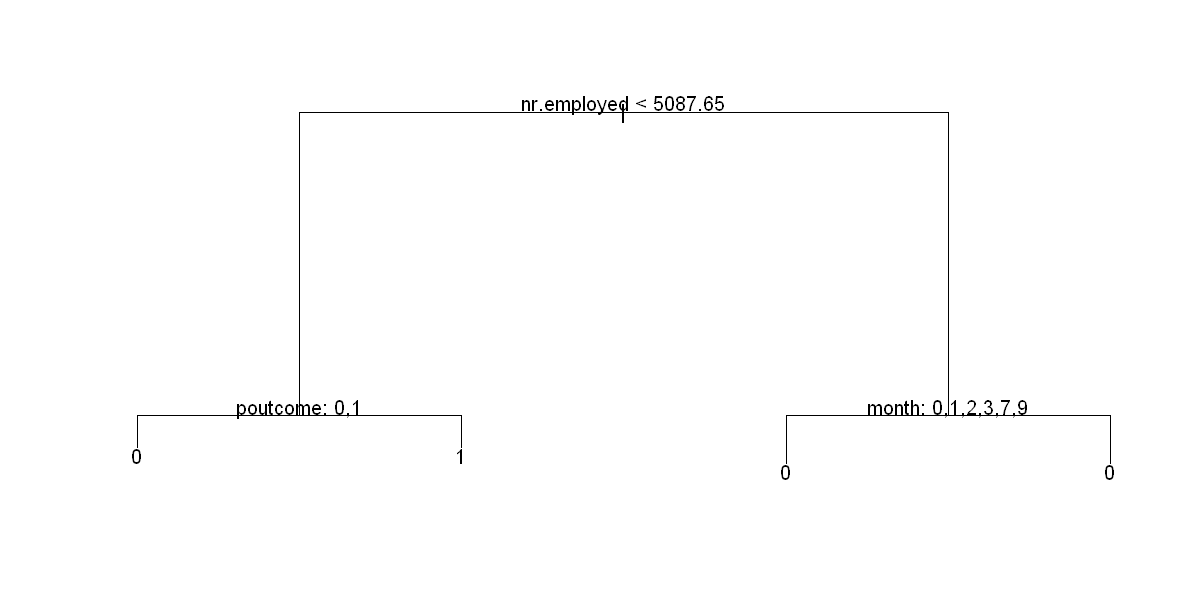

In [51]:
# Plot the tree
options(repr.plot.width=10, repr.plot.height=5)
par(cex.lab=0.8, cex.axis=0.8, cex.main=0.8, cex.sub=0.8)
plot(tree.model)  # Plot the tree
text(tree.model, pretty=1)  # Add text

In [52]:
# Fit the model on the training set
set.seed(123)
cv.tree <- train(
  subscribe ~.,
 data = train, method = "rpart",
  trControl = trainControl("cv", number = 10),
  tuneLength = 10
  )

cv.tree

CART 

15000 samples
   20 predictor
    2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 13500, 13500, 13500, 13500, 13500, 13500, ... 
Resampling results across tuning parameters:

  cp           Accuracy   Kappa    
  0.001350309  0.8932663  0.3016944
  0.001446759  0.8933331  0.3008829
  0.001736111  0.8941331  0.2964600
  0.002025463  0.8943331  0.2878439
  0.002507716  0.8944666  0.2877327
  0.002604167  0.8948666  0.2840381
  0.002893519  0.8948666  0.2840381
  0.003182870  0.8951334  0.2678341
  0.004050926  0.8960669  0.2521261
  0.052372685  0.8892660  0.1145450

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.004050926.

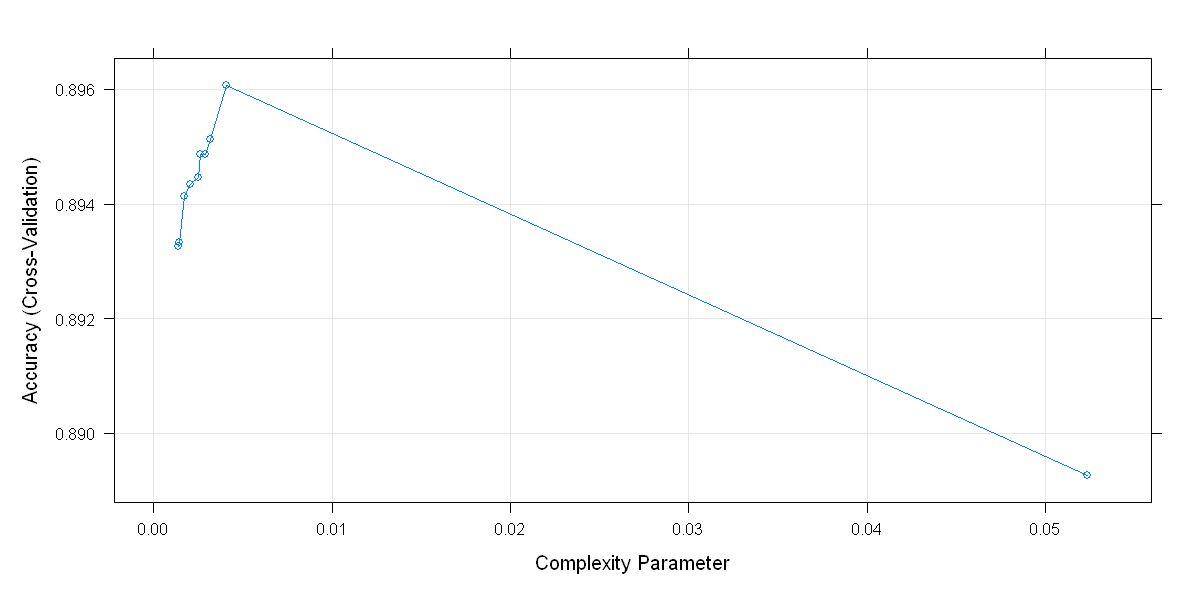

In [53]:
plot(cv.tree)

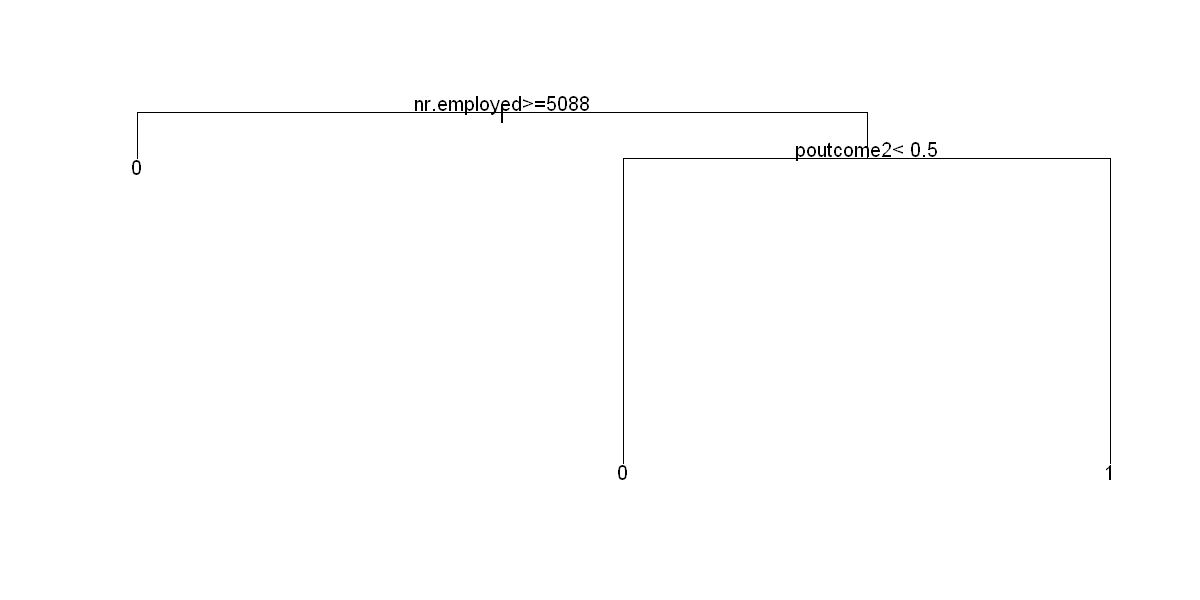

In [54]:
# Plot the final tree model
par(xpd = NA) # Avoid clipping the text in some device
plot(cv.tree$finalModel)
text(cv.tree$finalModel,  digits = 3)

In [55]:
# Make predictions on the test data
tree_pred <- cv.tree %>% predict(test)

In [56]:
confusionMatrix(tree_pred,test$subscribe,mode = "everything")

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 4422  436
         1   35  107
                                          
               Accuracy : 0.9058          
                 95% CI : (0.8974, 0.9138)
    No Information Rate : 0.8914          
    P-Value [Acc > NIR] : 0.000466        
                                          
                  Kappa : 0.28            
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9921          
            Specificity : 0.1971          
         Pos Pred Value : 0.9103          
         Neg Pred Value : 0.7535          
              Precision : 0.9103          
                 Recall : 0.9921          
                     F1 : 0.9494          
             Prevalence : 0.8914          
         Detection Rate : 0.8844          
   Detection Prevalence : 0.9716          
      Balanced Accuracy 

In [57]:
pred_roc <- pROC::roc(as.numeric(tree_pred), as.numeric(test$subscribe == 1))
pred_auc <- pROC::auc(pred_roc)
print(paste('AUC =', pred_auc))

Setting levels: control = 1, case = 2

Setting direction: controls < cases



[1] "AUC = 0.831886129456856"


### RANDOM FOREST

In [58]:
rf.model =randomForest(subscribe~.,data=train,
mtry=20, ntree =100)

In [59]:
summary(rf.model)

                Length Class  Mode     
call                5  -none- call     
type                1  -none- character
predicted       15000  factor numeric  
err.rate          300  -none- numeric  
confusion           6  -none- numeric  
votes           30000  matrix numeric  
oob.times       15000  -none- numeric  
classes             2  -none- character
importance         20  -none- numeric  
importanceSD        0  -none- NULL     
localImportance     0  -none- NULL     
proximity           0  -none- NULL     
ntree               1  -none- numeric  
mtry                1  -none- numeric  
forest             14  -none- list     
y               15000  factor numeric  
test                0  -none- NULL     
inbag               0  -none- NULL     
terms               3  terms  call     

In [60]:
 library(doParallel)
 cores <- 7
 registerDoParallel(cores = cores)
#mtry: Number of random variables collected at each split. In normal equal square number columns.
mtry <- sqrt((ncol(train)-1))
#ntree: Number of trees to grow.
ntree <- 100


control <- trainControl(method='cv', 
                        number=5, 
                        search = 'random')

#Random generate 15 mtry values with tuneLength = 15
set.seed(1)
rf_random <- train(subscribe ~ .,
                   data = train,
                   method = 'rf',
                   metric = 'Accuracy',
                   tuneLength  = 15, 
                   trControl = control)
print(rf_random)

Loading required package: foreach


Attaching package: 'foreach'


The following objects are masked from 'package:purrr':

    accumulate, when


Loading required package: iterators

Loading required package: parallel



Random Forest 

15000 samples
   20 predictor
    2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 12000, 12001, 12000, 11999, 12000 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa     
   1    0.8864668  0.02864641
   7    0.8951332  0.31096911
   9    0.8948001  0.31945440
  10    0.8954001  0.32316700
  14    0.8928002  0.31692661
  18    0.8922670  0.31806263
  21    0.8916668  0.31888088
  23    0.8914668  0.31430947
  33    0.8908001  0.31707809
  34    0.8909337  0.31585588
  39    0.8900671  0.31198197
  42    0.8889337  0.31078731
  43    0.8902004  0.31719671
  46    0.8903338  0.31797571

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 10.


In [115]:
rf.model =randomForest(subscribe~.,data=train,
mtry=10, ntree =100)

In [116]:
rf.model


Call:
 randomForest(formula = subscribe ~ ., data = train, mtry = 10,      ntree = 100) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 10

        OOB estimate of  error rate: 11.19%
Confusion matrix:
      0   1 class.error
0 12819 453  0.03413201
1  1225 503  0.70891204

In [124]:
levels(test$default) <- c("0","1","2")
# Make predictions on the test data
rf_pred <- rf.model %>% predict(test)

In [125]:
confusionMatrix(factor(rf_pred),test$subscribe,mode = "everything")

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 4335  366
         1  122  177
                                          
               Accuracy : 0.9024          
                 95% CI : (0.8938, 0.9105)
    No Information Rate : 0.8914          
    P-Value [Acc > NIR] : 0.00605         
                                          
                  Kappa : 0.372           
                                          
 Mcnemar's Test P-Value : < 2e-16         
                                          
            Sensitivity : 0.9726          
            Specificity : 0.3260          
         Pos Pred Value : 0.9221          
         Neg Pred Value : 0.5920          
              Precision : 0.9221          
                 Recall : 0.9726          
                     F1 : 0.9467          
             Prevalence : 0.8914          
         Detection Rate : 0.8670          
   Detection Prevalence : 0.9402          
      Balanced Accuracy 

In [126]:
pred_roc <- pROC::roc(as.numeric(rf_pred), as.numeric(test$subscribe == 1))
pred_auc <- pROC::auc(pred_roc)
print(paste('AUC =', pred_auc))

Setting levels: control = 1, case = 2

Setting direction: controls < cases



[1] "AUC = 0.757058734390107"
